<h1><center>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</h1></center>
<h1><center>Final Project</h1></center>

<b>Group_ID: <code> 4 </code><b>

<b>Group Members:</b>  

1. <code>Riasat_B00974221</code>
2. <code>Mahsa_B00954491</code>
3. <code>Dorsa_B00965859</code>
4. <code>Lovelyn_B00926199</code>


# 1. Dataset Information 

<h4> Dataset Name: <code> weather.csv</code></h4>
<h4> Link to the Dataset: <code>https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/county/mapping/110/tavg/202212/60/value</code> </h4>
<h4> Dataset Description: This dataset features data containing county average temperate and weather from January 2018 to December 2022 For the United States. The Dataset is collected by the National Center for Environmental Information. This dataset contains 3108 datapoints for each county in the contigious United States. </h4>
<code> Provide short description of the dataset here </code>


# 2. Task Information 

<h4> Task Goal: <code> Predict the best places to move into given user preferences </code></h4>
<h4> Task Description: </h4>
    <code>This research introduces a specialized system designed to help both new immigrants and existing citizens of the United States be suggest the best states to move into. This is done by taking several user preferences regarding factors such as  income, cost of living, preferred weather, and preferred demographics etc. This approach ensures multiple facets are considered in regards to choosing the best states for each individual user.</code>

# 3. Task Implementation: Coding

### 3.1 Preprocessing 

#### 3.1.1 Original Dataset

In [47]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset
import torch

In [48]:
df_weather = pd.read_csv('weather.csv')
df_weather

,ID,Name,State,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,AL-001,Autauga County,Alabama,65.8,121.0,1.9,63.9
1,AL-003,Baldwin County,Alabama,68.4,121.0,1.6,66.8
2,AL-005,Barbour County,Alabama,65.9,120.0,1.1,64.8
3,AL-007,Bibb County,Alabama,64,120.0,1.2,62.7
4,AL-009,Blount County,Alabama,62.6,121.0,2.0,60.6
...,...,...,...,...,...,...,...
3102,WY-037,Sweetwater County,Wyoming,42.3,109.0,1.5,40.7
3103,WY-039,Teton County,Wyoming,35.5,113.0,1.2,34.4
3104,WY-041,Uinta County,Wyoming,40.3,108.0,1.2,39.1
3105,WY-043,Washakie County,Wyoming,44.4,91.0,1.0,43.4


In [49]:
df_weather = df_weather.rename(columns={'Name':'county', 'State':'state'})
df_weather

,ID,county,state,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,AL-001,Autauga County,Alabama,65.8,121.0,1.9,63.9
1,AL-003,Baldwin County,Alabama,68.4,121.0,1.6,66.8
2,AL-005,Barbour County,Alabama,65.9,120.0,1.1,64.8
3,AL-007,Bibb County,Alabama,64,120.0,1.2,62.7
4,AL-009,Blount County,Alabama,62.6,121.0,2.0,60.6
...,...,...,...,...,...,...,...
3102,WY-037,Sweetwater County,Wyoming,42.3,109.0,1.5,40.7
3103,WY-039,Teton County,Wyoming,35.5,113.0,1.2,34.4
3104,WY-041,Uinta County,Wyoming,40.3,108.0,1.2,39.1
3105,WY-043,Washakie County,Wyoming,44.4,91.0,1.0,43.4


In [50]:
df= df_weather.copy()
df

,ID,county,state,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,AL-001,Autauga County,Alabama,65.8,121.0,1.9,63.9
1,AL-003,Baldwin County,Alabama,68.4,121.0,1.6,66.8
2,AL-005,Barbour County,Alabama,65.9,120.0,1.1,64.8
3,AL-007,Bibb County,Alabama,64,120.0,1.2,62.7
4,AL-009,Blount County,Alabama,62.6,121.0,2.0,60.6
...,...,...,...,...,...,...,...
3102,WY-037,Sweetwater County,Wyoming,42.3,109.0,1.5,40.7
3103,WY-039,Teton County,Wyoming,35.5,113.0,1.2,34.4
3104,WY-041,Uinta County,Wyoming,40.3,108.0,1.2,39.1
3105,WY-043,Washakie County,Wyoming,44.4,91.0,1.0,43.4


In [51]:
df = df.drop(['ID', 'Rank'], axis=1)
df = df.rename(columns={'Value': 'avg temp'})
df

,county,state,avg temp,Anomaly (1901-2000 base period),1901-2000 Mean
0,Autauga County,Alabama,65.8,1.9,63.9
1,Baldwin County,Alabama,68.4,1.6,66.8
2,Barbour County,Alabama,65.9,1.1,64.8
3,Bibb County,Alabama,64,1.2,62.7
4,Blount County,Alabama,62.6,2.0,60.6
...,...,...,...,...,...
3102,Sweetwater County,Wyoming,42.3,1.5,40.7
3103,Teton County,Wyoming,35.5,1.2,34.4
3104,Uinta County,Wyoming,40.3,1.2,39.1
3105,Washakie County,Wyoming,44.4,1.0,43.4


 We remove the Columns 'ID', 'Rank, as we only require  Temperature data for our specified years. We just remove all internal metadata.

In [52]:
label_s = np.unique(df['state'])
label_c = np.unique(df['county'])

We now get the total number of unique states and counties tog et the number of classes for each.

#### 3.1.4 Class Imbalance and Oversampling

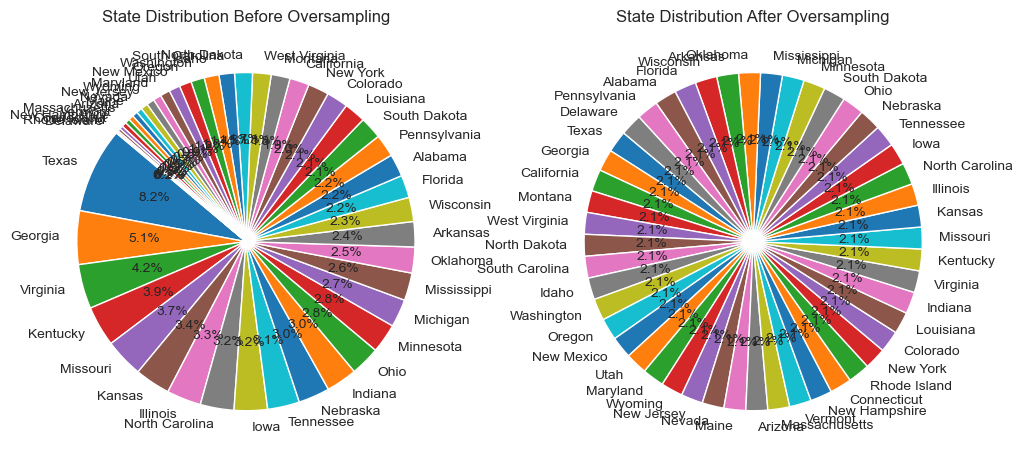

In [53]:
class_counts_before = df['state'].value_counts()
max_class_count = df['state'].value_counts().max()

oversampled_data = []
for class_label, count in df['state'].value_counts().items():
    class_data = df[df['state'] == class_label]
    oversampled_data.append(class_data.sample(max_class_count, replace=True))

df = pd.concat(oversampled_data)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(class_counts_before, labels=class_counts_before.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('State Distribution Before Oversampling')

axs[1].pie(df['state'].value_counts(), labels= df['state'].value_counts().index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('State Distribution After Oversampling')

plt.show()

We now account for data imbalance by oversampling the dataset to equalize the number of datapoints for each state. We show a pie chart of the class distribution of states before and after oversampling. 

#### 3.1.5 Data Encoding and Shuffling 

In [54]:
encoder = LabelEncoder()
df['state'] = encoder.fit_transform(df['state'])
df['county'] = encoder.fit_transform(df['county'])
df['avg temp'] = encoder.fit_transform(df['avg temp'])
df

,county,state,avg temp,Anomaly (1901-2000 base period),1901-2000 Mean
2510,183,40,295,2.3,64.5
2550,439,40,337,2.1,69.1
2521,251,40,219,2.4,56.8
2720,1587,40,328,1.8,68.4
2579,636,40,271,1.0,63.3
...,...,...,...,...,...
289,1495,6,208,3.4,54.7
289,1495,6,208,3.4,54.7
287,815,6,197,3.0,54.0
288,1087,6,187,2.8,53.2


In [55]:
df = df.apply(pd.to_numeric)
df

,county,state,avg temp,Anomaly (1901-2000 base period),1901-2000 Mean
2510,183,40,295,2.3,64.5
2550,439,40,337,2.1,69.1
2521,251,40,219,2.4,56.8
2720,1587,40,328,1.8,68.4
2579,636,40,271,1.0,63.3
...,...,...,...,...,...
289,1495,6,208,3.4,54.7
289,1495,6,208,3.4,54.7
287,815,6,197,3.0,54.0
288,1087,6,187,2.8,53.2


In [56]:
df.isnull().sum()

county                             0
state                              0
avg temp                           0
Anomaly (1901-2000 base period)    0
1901-2000 Mean                     0
dtype: int64

In [57]:
df = df.sample(frac=1).reset_index(drop=True)
df

,county,state,avg temp,Anomaly (1901-2000 base period),1901-2000 Mean
0,621,8,308,1.7,66.4
1,414,41,47,1.6,40.4
2,108,46,32,1.5,39.0
3,660,8,248,2.0,60.1
4,1525,47,2,1.2,34.4
...,...,...,...,...,...
12187,1485,18,148,3.6,48.5
12188,1229,18,149,3.4,48.8
12189,467,20,67,1.1,42.9
12190,1493,30,205,2.3,55.5


We now finalize our data preprocessing with the following steps:

1. Check for any null values that might exist in the dataset.
2. Use Label Encoding to encode all categorical data to numeric data to be more freely usable to ML and Deep Learning Models.
3. Change Types of all columns in the dataset to be numeric in case some columns do not have the correct type despite all of them being numerical data.
4. We shuffle the dataset so that no model can find any patterns from the arrangement of the data 

#### 3.1.6 X Subset Preprocessing


In [58]:
df_x = df.drop(columns=['state', 'county'])
df_x = df_x.astype('float64')
df_x

,avg temp,Anomaly (1901-2000 base period),1901-2000 Mean
0,308.0,1.7,66.4
1,47.0,1.6,40.4
2,32.0,1.5,39.0
3,248.0,2.0,60.1
4,2.0,1.2,34.4
...,...,...,...
12187,148.0,3.6,48.5
12188,149.0,3.4,48.8
12189,67.0,1.1,42.9
12190,205.0,2.3,55.5


In [59]:
df_x_cols = df_x.columns
scaler = StandardScaler()
df_x = scaler.fit_transform(df_x)
df_x

array([[ 1.80664062, -0.08013077,  1.79632996],
       [-1.41635397, -0.10987516, -1.35451472],
       [-1.60158354, -0.13961954, -1.52417559],
       ...,
       [-1.1693812 , -0.25859708, -1.05154889],
       [ 0.53473088,  0.09833554,  0.47539892],
       [-1.18172984, -0.37757462, -1.01519299]])

In [60]:
df_x = df_x - df_x.min().min()
df_x

array([[7.72988014, 5.84310875, 7.71956948],
       [4.50688555, 5.81336436, 4.56872479],
       [4.32165598, 5.78361998, 4.39906393],
       ...,
       [4.75385832, 5.66464244, 4.87169063],
       [6.4579704 , 6.02157506, 6.39863844],
       [4.74150968, 5.5456649 , 4.90804653]])

We separate out all labels from the original dataframe and put in into a new dataframe. Then wo do the following transformations to the new Dataset:

1. We convert all columns to float64. This is done so that all columns in the dataframe share a type to make future transformations easier.
2. We scale the data using a Standard Scaler. This is done because most of the columns contains data that are not on similar scales, which might lead to errors for several machine learning algorithms.
3. We then shift the scaled values to only contain positive values. This is done by subtracting the lowest negative value from all datapoints. This way, the lowest value in the dataframe becomes 0, thereby placing all other datapoints on the positive scales. This is done because some algorithms like Naive Bayes work best on positive values. 

#### 3.1.7 Y Subset Preprocessing

In [61]:
df_y = df[['state', 'county']]
df_y = df_y.astype('int64')
df_y

,state,county
0,8,621
1,41,414
2,46,108
3,8,660
4,47,1525
...,...,...
12187,18,1485
12188,18,1229
12189,20,467
12190,30,1493


We then seperate out the labels into their own dataframe. Note that since we are only predicting states, we only use the states columns for all predictions.

#### 3.1.8 Train Test Split

In [62]:
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(df_x, df_y, test_size=0.33, random_state=42, stratify=df_y['state'])
x_train_s

array([[4.0376373 , 5.75387559, 4.09609809],
       [6.32213538, 5.78361998, 6.36228254],
       [5.77879529, 6.02157506, 5.7321136 ],
       ...,
       [7.61874239, 5.78361998, 7.64685768],
       [6.21099763, 5.81336436, 6.25321484],
       [5.85288712, 6.28927453, 5.6957577 ]])

#### 3.1.9 Tensor Dataset and Dataloader for Pytorch

In [63]:
x_train_sr = torch.FloatTensor(x_train_s)
x_test_sr = torch.FloatTensor(x_test_s)
x_train_sr

tensor([[4.0376, 5.7539, 4.0961],
        [6.3221, 5.7836, 6.3623],
        [5.7788, 6.0216, 5.7321],
        ...,
        [7.6187, 5.7836, 7.6469],
        [6.2110, 5.8134, 6.2532],
        [5.8529, 6.2893, 5.6958]])

In [64]:
y_train_sr = torch.LongTensor(y_train_s['state'].values)
y_test_sr = torch.LongTensor(y_test_s['state'].values)
y_train_sr

tensor([20, 45, 32,  ..., 15, 13, 36])

In [65]:
n_states = len(np.unique(df_y['state']))
n_states

48

In [66]:
input_dim = df_x.shape[1]
input_dim

3

In [67]:
train_db_s = TensorDataset(x_train_sr, y_train_sr)
data_loader_s = DataLoader(train_db_s, batch_size=n_states, shuffle=False)

We then split the x and y dataframes into train test sets to be used by the models. These sets are then turned into tensors for use in our custom neural network.

#### 3.1.10 Exploratory Data Analysis


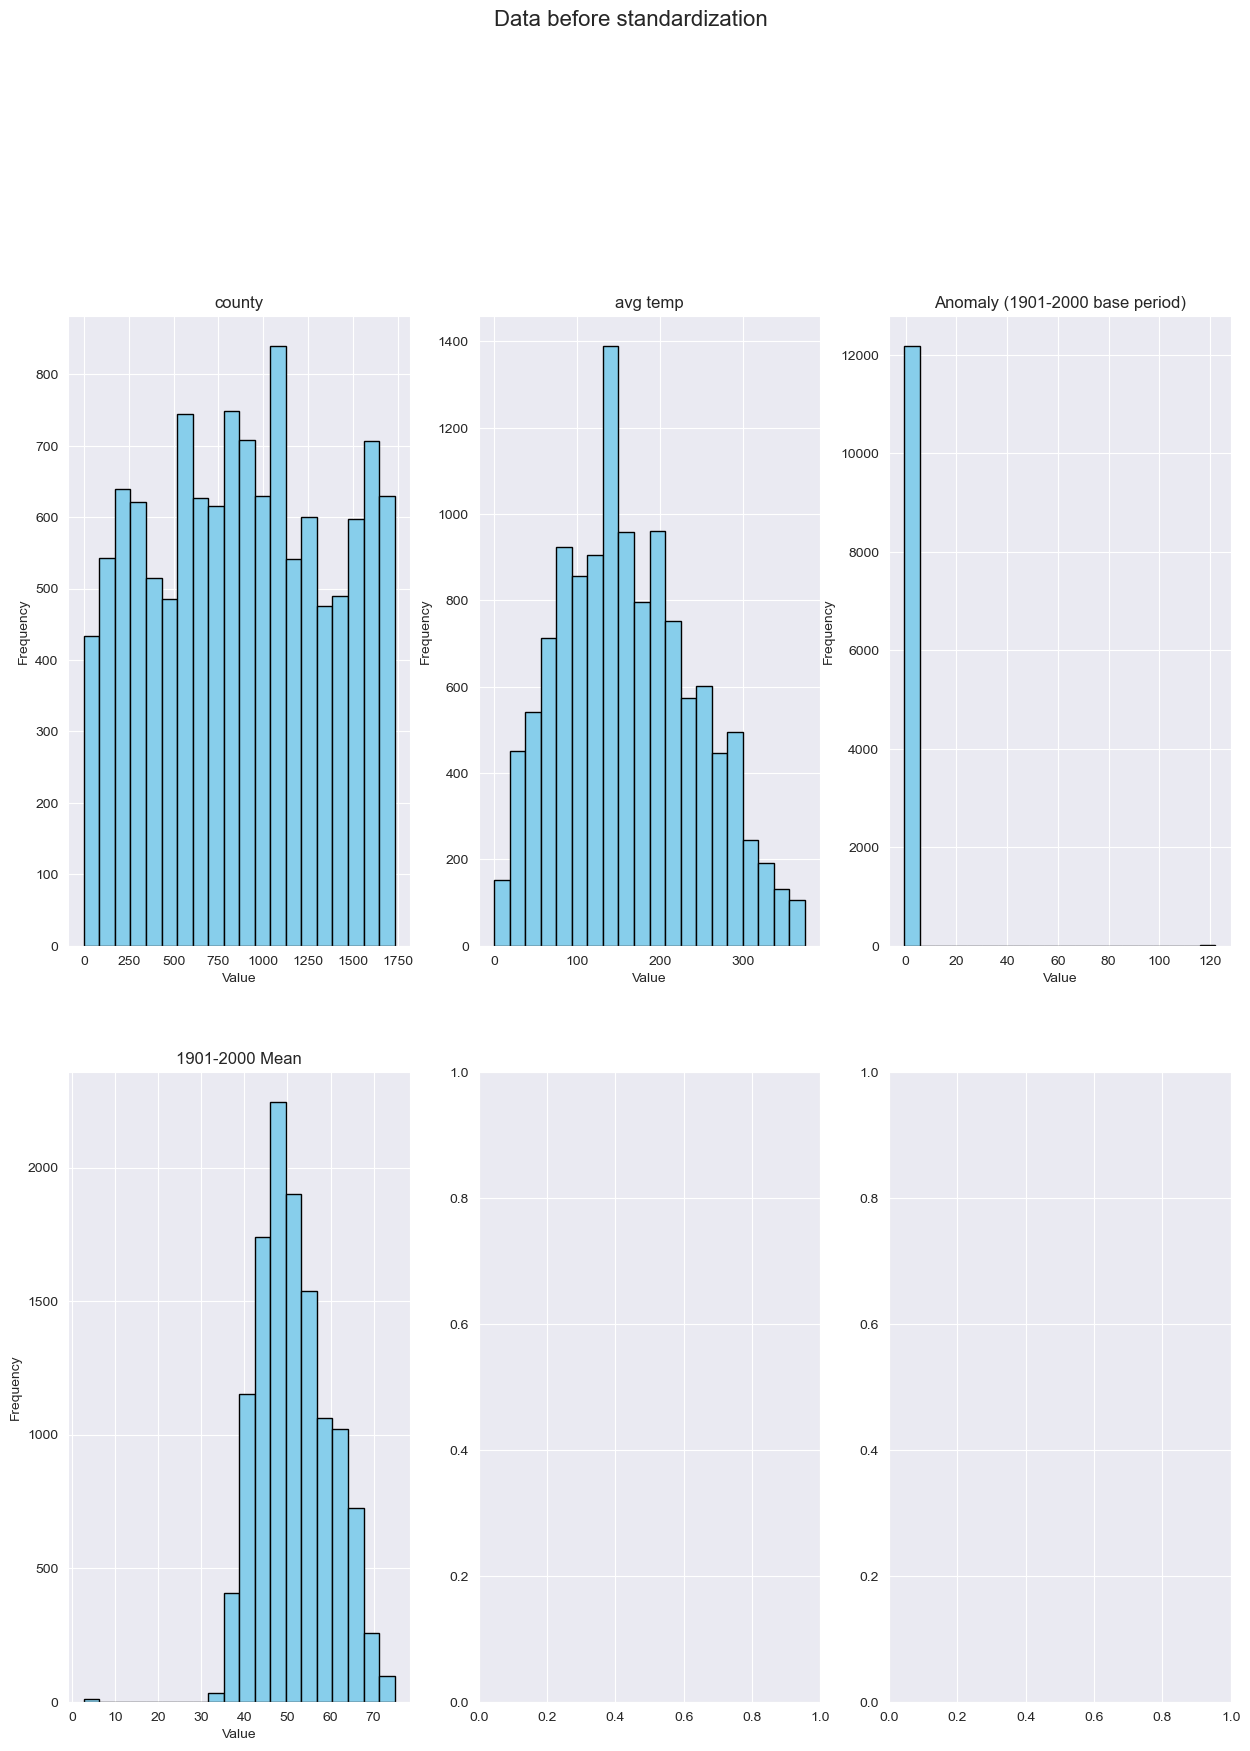

In [68]:
temp = df.copy()
temp = temp.drop(columns=['state'])

cols_to_drop = temp.columns[(temp.nunique() < 10)]
temp = temp.drop(columns=cols_to_drop)

fig, axes = plt.subplots(nrows=int(np.ceil(len(temp.columns) / 3)), ncols=3, figsize=(15, 18))

axes = axes.flatten()
for i, col in enumerate(temp.columns):
    axes[i].hist(temp[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.suptitle('Data before standardization', y=1.05, fontsize=16)


plt.savefig('graph/before_standard.png')
plt.show

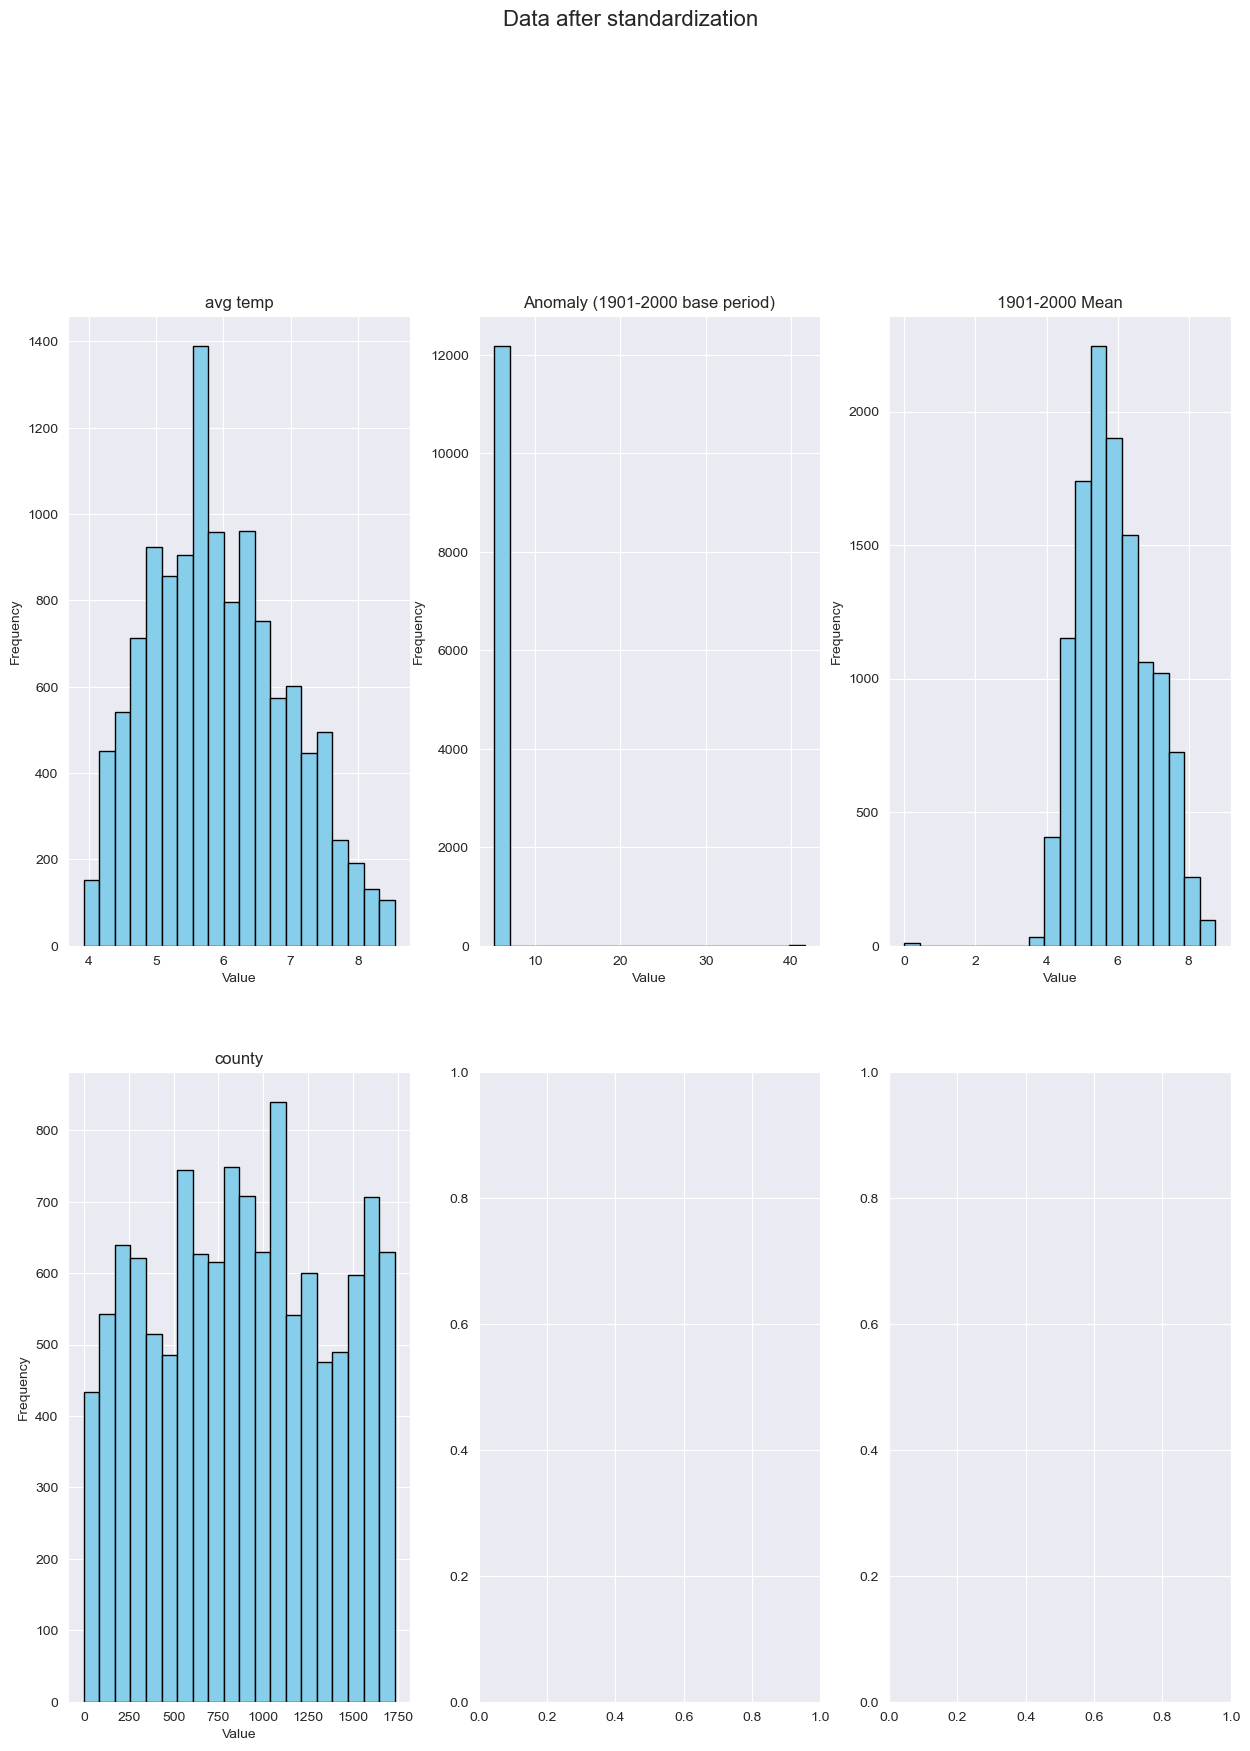

In [69]:
tdf_x = pd.DataFrame(df_x, columns=df_x_cols)
temp = pd.concat([tdf_x, df_y])

temp = temp.drop(columns=['state'])

cols_to_drop = temp.columns[(temp.nunique() < 10)]
temp = temp.drop(columns=cols_to_drop)


fig, axes = plt.subplots(nrows=int(np.ceil(len(temp.columns) / 3)), ncols=3, figsize=(15, 18))

axes = axes.flatten()
for i, col in enumerate(temp.columns):
    axes[i].hist(temp[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.suptitle('Data after standardization', y=1.05, fontsize=16)


plt.savefig('graph/after_standard.png')
plt.show()

The two graphs above show histograms for the columns of the dataframe before and after the standardization process. To this end we did not categorical columns, columns with less than 10 unique points to make graphs easier to understand. 

We can immediately notice that the graphs from before the standardization process and after it seem almost the same. This proves that even though the values of the data points were changed during standardization, it still managed to preserve its qualities.

Regarding the graphs themselves, we can see that most of the histograms are centered. THis shows an even distribution of data for all data. One notable exception is the Anomaly column  which is heavily biased to the left. The counties column is also another exception, whcih shows the most even distibution of all graphs.

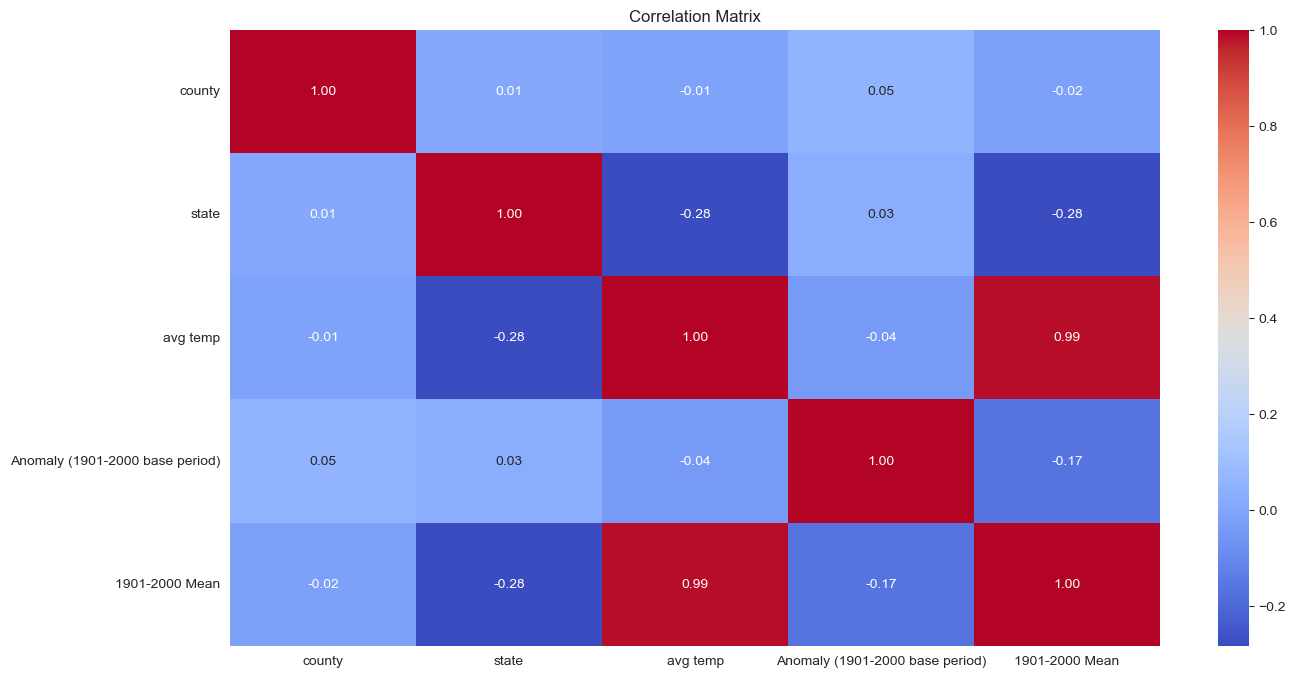

In [70]:
fig = plt.figure(figsize=(15, 8))
temp = df.copy()

correlation_matrix = temp.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

plt.savefig('graph/cor.png')
plt.show()

The correlation matrix above shows us how each feature is linked to one another. From the outset, we see that both the average temperature and mean of 1901-2000 are highly correlated. This can be explained by the fact that the current average temperature pattern was very similar to the data from the years past. 

Most significantly, we can see no clear correlation between the state and other features, signaling the fact that we need all the features we can get to conjure an accurate prediction for the best state.

### 3.2 Model development and training 

In [71]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#### 3.2.1 Logistic Regression

In [72]:
logreg_classifier = LogisticRegression(multi_class='multinomial')
logreg_classifier.fit(x_train_s, y_train_s['state'])
logreg_pred =  logreg_classifier.predict(x_test_s)

C:\Users\riasa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We use Multonomial logistic regression model for the  prediction of states.

#### 3.2.2  Classifier


In [73]:
svm_classifier = SVC(kernel='linear', decision_function_shape='ovr')
svm_classifier.fit(x_train_s, y_train_s['state'])
svm_pred = svm_classifier.predict(x_test_s)

In [74]:
svm_classifier = SVC(kernel='linear', decision_function_shape='ovo')
svm_classifier.fit(x_train_s, y_train_s['state'])
svm_pred_ova = svm_classifier.predict(x_test_s)

We use Multonomial logistic regression model for the  prediction of states. We use both the one-vs-all and one-vs-one strategies.

#### 3.2.3 Naive Bayes Classifier


In [75]:
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train_s, y_train_s['state'])
nb_pred = nb_classifier.predict(x_test_s)

We use Multonomial Naive Bayes model for the  prediction of states.

#### 3.2.4 Custom Neural Network

In [99]:
class Net(nn.Module):
    def __init__(self, os):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.elu1 = nn.ELU()
        self.fc2 = nn.Linear(32, 64)
        self.elu2 = nn.ELU()
        self.fc3 = nn.Linear(64, 128)
        self.elu3 = nn.ELU()
        self.fc4 = nn.Linear(128, 256)
        self.elu4 = nn.ELU()
        self.fc7 = nn.Linear(256, os)

    def forward(self, x):
        x = self.fc1(x)
        x = self.elu1(x)
        x = self.fc2(x)
        x = self.elu2(x)
        x = self.fc3(x)
        x = self.elu3(x)
        x = self.fc4(x)
        x = self.elu4(x)
        x = self.fc7(x)
        return x

In [100]:
model_s = Net(n_states)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_s.parameters(), lr=0.0001)

train_acc = []
train_pre = []
train_rec = []
train_f1 = []
train_loss = []

epochs = 100

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_s = model_s.to(device)

for epoch in range(epochs):
    output1 = model_s(x_train_sr.to(device))
    total_loss = 0.00
    correct_predictions = 0
    total_samples = 0
    
    all_labels = []
    all_preds = []

    for batch_idx, (inputs, labels) in enumerate(data_loader_s, 1):
        model_s.train()
        inputs ,labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model_s(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()
        
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

        if batch_idx % 100 == 0 or batch_idx == len(data_loader_s):
            avg_l = total_loss / batch_idx
            avg_acc = correct_predictions/total_samples
            print('Epoch', epoch+1, '/', epochs, 'Batch', batch_idx, '/', len(data_loader_s), 'Loss', avg_l, 'Batch Accuracy', avg_acc)



    avg_e_loss = total_loss / len(data_loader_s)
    acc =  accuracy_score(all_labels, all_preds)
    
    train_acc.append(accuracy_score(all_labels, all_preds))
    train_pre.append(precision_score(all_labels, all_preds, average='macro', zero_division=0.0))
    train_rec.append(recall_score(all_labels, all_preds, average='macro' ,zero_division=0.0))
    train_f1.append(f1_score(all_labels, all_preds, average='macro',zero_division=0.0))
    train_loss.append(avg_e_loss)
    print('====================================================')
    print('Epoch', epoch+1, '/', epochs, 'Average Loss: ', avg_e_loss, 'Average Accuracy for Epoch', acc)
    print('====================================================')

Epoch 1 / 100 Batch 100 / 171 Loss 3.860311005115509 Batch Accuracy 0.019583333333333335
Epoch 1 / 100 Batch 171 / 171 Loss 3.83280186625252 Batch Accuracy 0.02742409402546523
Epoch 1 / 100 Average Loss:  3.83280186625252 Average Accuracy for Epoch 0.02742409402546523
Epoch 2 / 100 Batch 100 / 171 Loss 3.5712043023109437 Batch Accuracy 0.05416666666666667
Epoch 2 / 100 Batch 171 / 171 Loss 3.463039537619429 Batch Accuracy 0.052277179236043095
Epoch 2 / 100 Average Loss:  3.463039537619429 Average Accuracy for Epoch 0.052277179236043095
Epoch 3 / 100 Batch 100 / 171 Loss 3.15896831035614 Batch Accuracy 0.07479166666666667
Epoch 3 / 100 Batch 171 / 171 Loss 3.1145877252545273 Batch Accuracy 0.08361900097943192
Epoch 3 / 100 Average Loss:  3.1145877252545273 Average Accuracy for Epoch 0.08361900097943192
Epoch 4 / 100 Batch 100 / 171 Loss 2.9884179162979128 Batch Accuracy 0.10083333333333333
Epoch 4 / 100 Batch 171 / 171 Loss 2.9639282115021643 Batch Accuracy 0.10161606268364348
Epoch 4 /

For our custom neural network, we opted for a moderately complex network, with 3 hidden layers between the input and output layers. We used ELU activation function for these hidden layers to avoid the dying relu problem, which occurs when the relu activation function outputs only 0 for all inputs. We used Cross Entropy loss for multi classification. We also used Adam optimizer as it tends to be the most well rounded optimizer for neural networks. We train our model with a learning rate of 1X10^-3 for 100 epochs. This ensures that the model will be able to slowly learn the patterns hidden in the data without a high risk of overfitting on the training data.

### 3.3 Model evaluation

#### 3.3.1 Evaluation of Logistic Regression 


In [101]:
print("Logistic Regression Accuracy", accuracy_score(y_test_s['state'], logreg_pred))
print("Logistic Regression Precision", precision_score(y_test_s['state'], logreg_pred, average='macro'))
print("Logistic Regression  Recall", recall_score(y_test_s['state'], logreg_pred, average='macro'))
print("Logistic Regression F1 Score", f1_score(y_test_s['state'], logreg_pred, average='macro'))

Logistic Regression Accuracy 0.26416500994035785
Logistic Regression Precision 0.2359840046600413
Logistic Regression  Recall 0.26408311818703384
Logistic Regression F1 Score 0.21642670751757964


Here we see that our logistic regressor model gets low scores across the board. This might signal complex relationships between data and a relatively high amount of outliers in the data.

#### 3.3.2 Evaluation of  SVM Classifier


In [102]:
print("SVM Classifier Accuracy", accuracy_score(y_test_s['state'], svm_pred))
print("SVM Classifier Precision", precision_score(y_test_s['state'], svm_pred, average='macro'))
print("SVM Classifier Recall", recall_score(y_test_s['state'], svm_pred, average='macro'))
print("SVM Classifier F1 Score", f1_score(y_test_s['state'], svm_pred, average='macro'))

SVM Classifier Accuracy 0.30069582504970177
SVM Classifier Precision 0.2783341295652723
SVM Classifier Recall 0.3006161550965768
SVM Classifier F1 Score 0.2780148033724715


In [103]:
print("SVM Classifier Accuracy", accuracy_score(y_test_s['state'], svm_pred_ova))
print("SVM Classifier Precision", precision_score(y_test_s['state'], svm_pred_ova, average='macro'))
print("SVM Classifier Recall", recall_score(y_test_s['state'], svm_pred_ova, average='macro'))
print("SVM Classifier F1 Score", f1_score(y_test_s['state'], svm_pred_ova, average='macro'))

SVM Classifier Accuracy 0.30069582504970177
SVM Classifier Precision 0.2783341295652723
SVM Classifier Recall 0.3006161550965768
SVM Classifier F1 Score 0.2780148033724715


Our SVM Model on the other hand, does very well with our data using both one vs all and one vs one stratagies. This might signify outliers in the data which SVM's are more resistant to. This also shows that the data is balanced with examples for all kinds of classes and its features contain the appropriate information for drawing a good decision boundary. 

#### 3.3.3 Evaluation of Naive Bayes Classifier

In [104]:
print("Naive Bayes Accuracy", accuracy_score(y_test_s['state'], nb_pred))
print("Naive Bayes Precision", precision_score(y_test_s['state'], nb_pred, average='macro'))
print("Naive Bayes Recall", recall_score(y_test_s['state'], nb_pred, average='macro'))
print("Naive Bayes F1 Score", f1_score(y_test_s['state'], nb_pred, average='macro'))

Naive Bayes Accuracy 0.11779324055666004
Naive Bayes Precision 0.09720857407963816
Naive Bayes Recall 0.11862927902084529
Naive Bayes F1 Score 0.0638287934262222


C:\Users\riasa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Our Naive Bayes Model performs the worst so far, with it not being able to cross the 50% threshold. This might indicate that the datapoints are not conditionally independent, leading to many wrong predictions by the model.

#### 3.3.4 Evaluation of  Custom Neural Network

In [105]:
test_db_s = TensorDataset(x_test_sr, y_test_sr)
data_loader_test_s = DataLoader(test_db_s, batch_size=n_states, shuffle=False)

In [106]:
model_s.eval()
total_loss = 0.0

nn_pred = []
nn_true = []

test_acc = []
test_pre = []
test_rec = []
test_f1 = []


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_s.to(device)


with torch.no_grad():
    for inputs, labels in data_loader_test_s:
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = model_s(inputs)
        nn_pred.extend(torch.argmax(outputs, dim=1).cpu().numpy())
        nn_true.extend(labels.cpu().numpy())

test_acc.append(accuracy_score(nn_true, nn_pred))
test_pre.append(precision_score(nn_true, nn_pred, average='macro', zero_division=0.0))
test_rec.append(recall_score(nn_true, nn_pred, average='macro' ,zero_division=0.0))
test_f1.append(f1_score(nn_true, nn_pred, average='macro',zero_division=0.0))

In [110]:
classes = label_s

print("Average Testing Accuracy ", test_acc[0])
print("Latest Training Accuracy ", train_acc[-1])
print('===================================================================')
print("Average Testing Precision ", test_pre[0])
print("Latest Training Precision ", train_pre[-1])
print('===================================================================')
print("Average Testing Recall ",test_rec[0])
print("Latest Training Recall ", train_rec[-1])
print('===================================================================')
print("Average Testing F1 Score",test_f1[0])
print("Latest Training F1 Score ", train_f1[-1])
print('===================================================================')

Average Testing Accuracy  0.35164015904572565
Latest Training Accuracy  0.3451273261508325
Average Testing Precision  0.299047690571178
Latest Training Precision  0.30525990639153605
Average Testing Recall  0.3514892904953146
Latest Training Recall  0.3451281389748882
Average Testing F1 Score 0.29873115115264526
Latest Training F1 Score  0.3138311405452006


Here for our custom neural network, we can see the highest scores of any model trained so far. This high accuracy shows that most its its predictions are correct, signifying its overall performance. The high precision and recall show that the model is great at minimizing false positives while being good at predicting actually positive instances of each class. The high F1 score also confirms that the model also has a good balance of its precision and recall scores.

The training scores being very close to actual test scores also signify that the model has not been overfitted to the training data even with the large number of epochs.

### 3.4 Analysis 

#### 3.4.1 Analysis of Logistic Regression

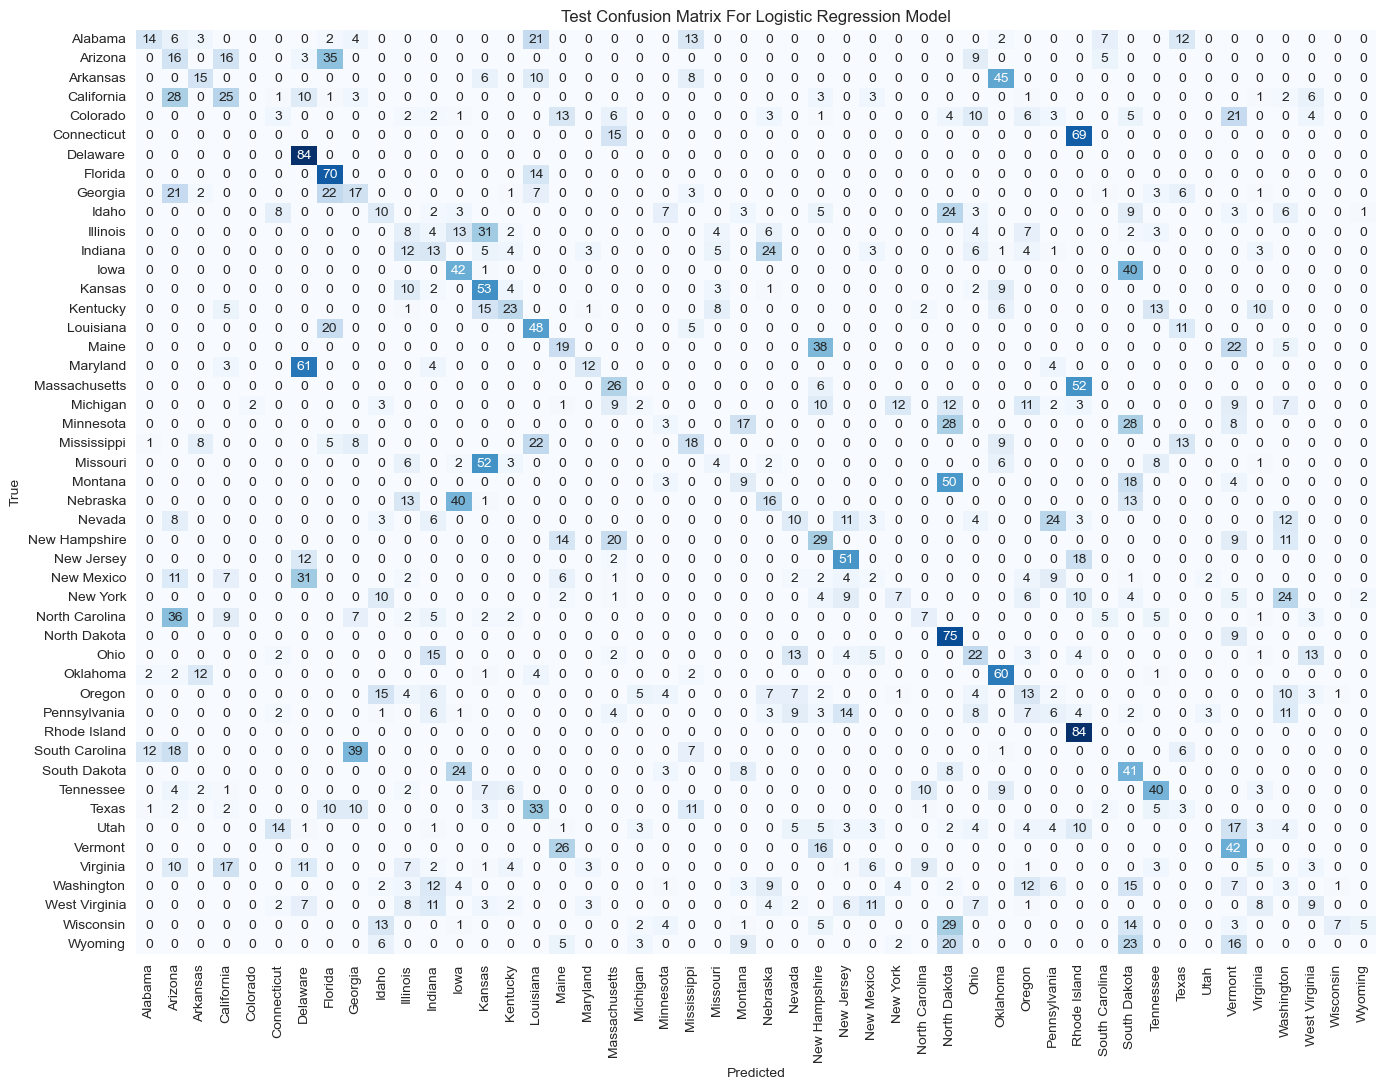

In [111]:
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix(y_test_s['state'], logreg_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix For Logistic Regression Model')

plt.savefig('graph/cm_logistic.png')
plt.show()

Looking at the confusion matrix of the logistic regression model, we can see that it makes a lot of correct predictions as evidenced by the diagonal line for all true positive instances. But as evidenced by the number of predictions outside the diagonal line, the model also has a lot of false positive and negative instances. The number of correct and incorrect predictions seems to be almost even, with more correct predictions.  

#### 3.4.2 Analysis of SVM Classifier

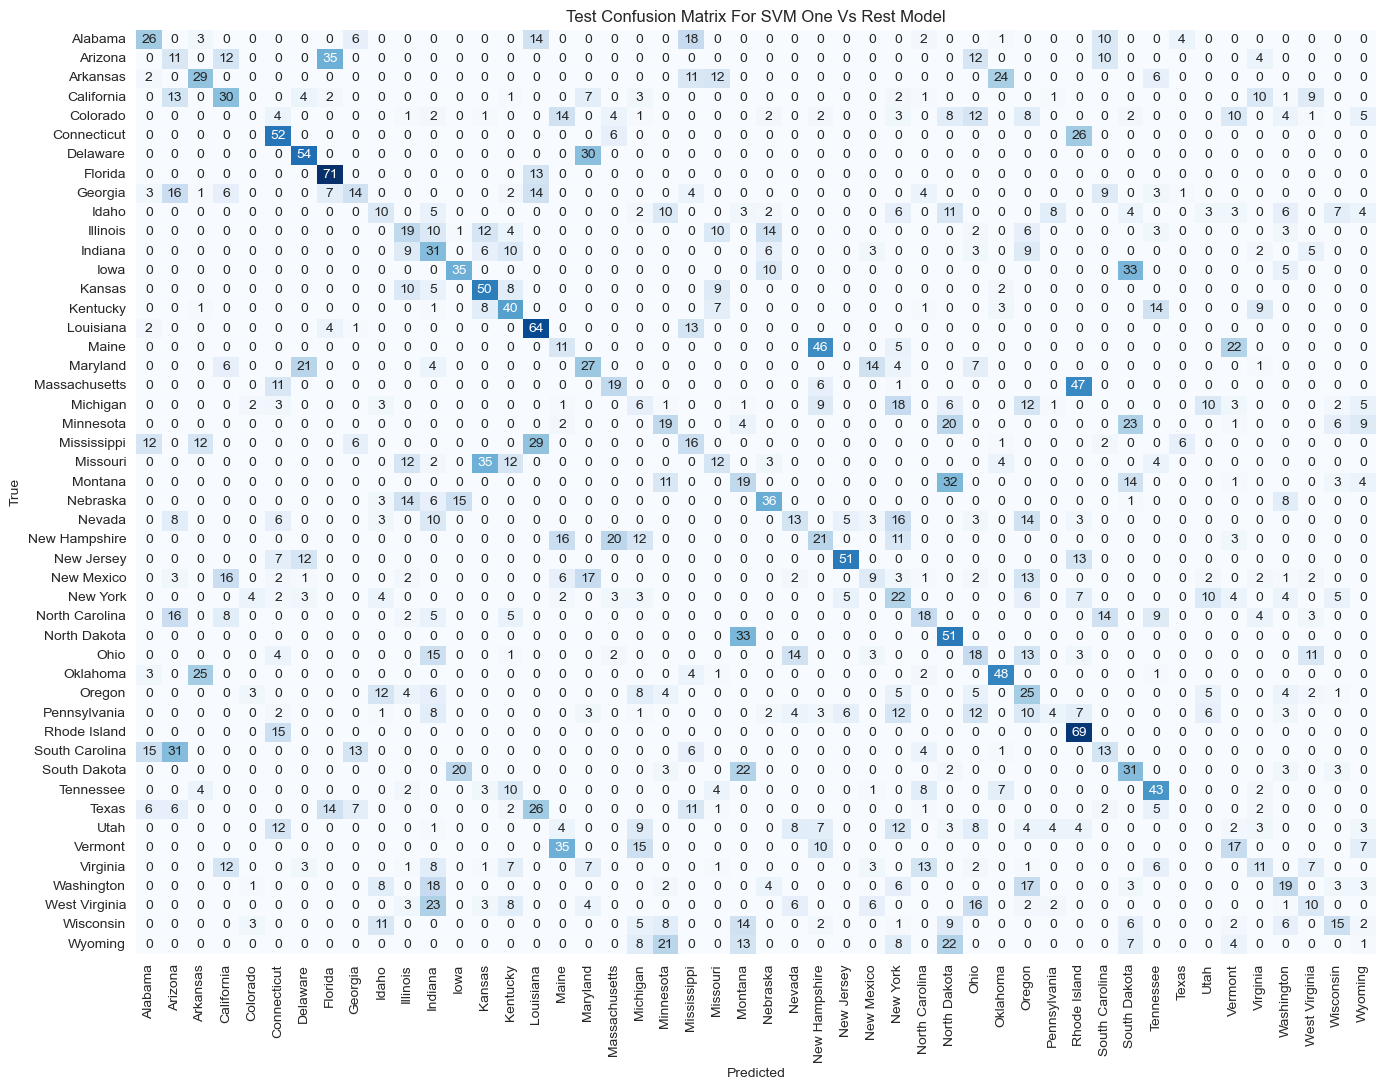

In [112]:
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix(y_test_s['state'], svm_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix For SVM One Vs Rest Model')
plt.savefig('graph/cm_svm_ovr.png')
plt.show()

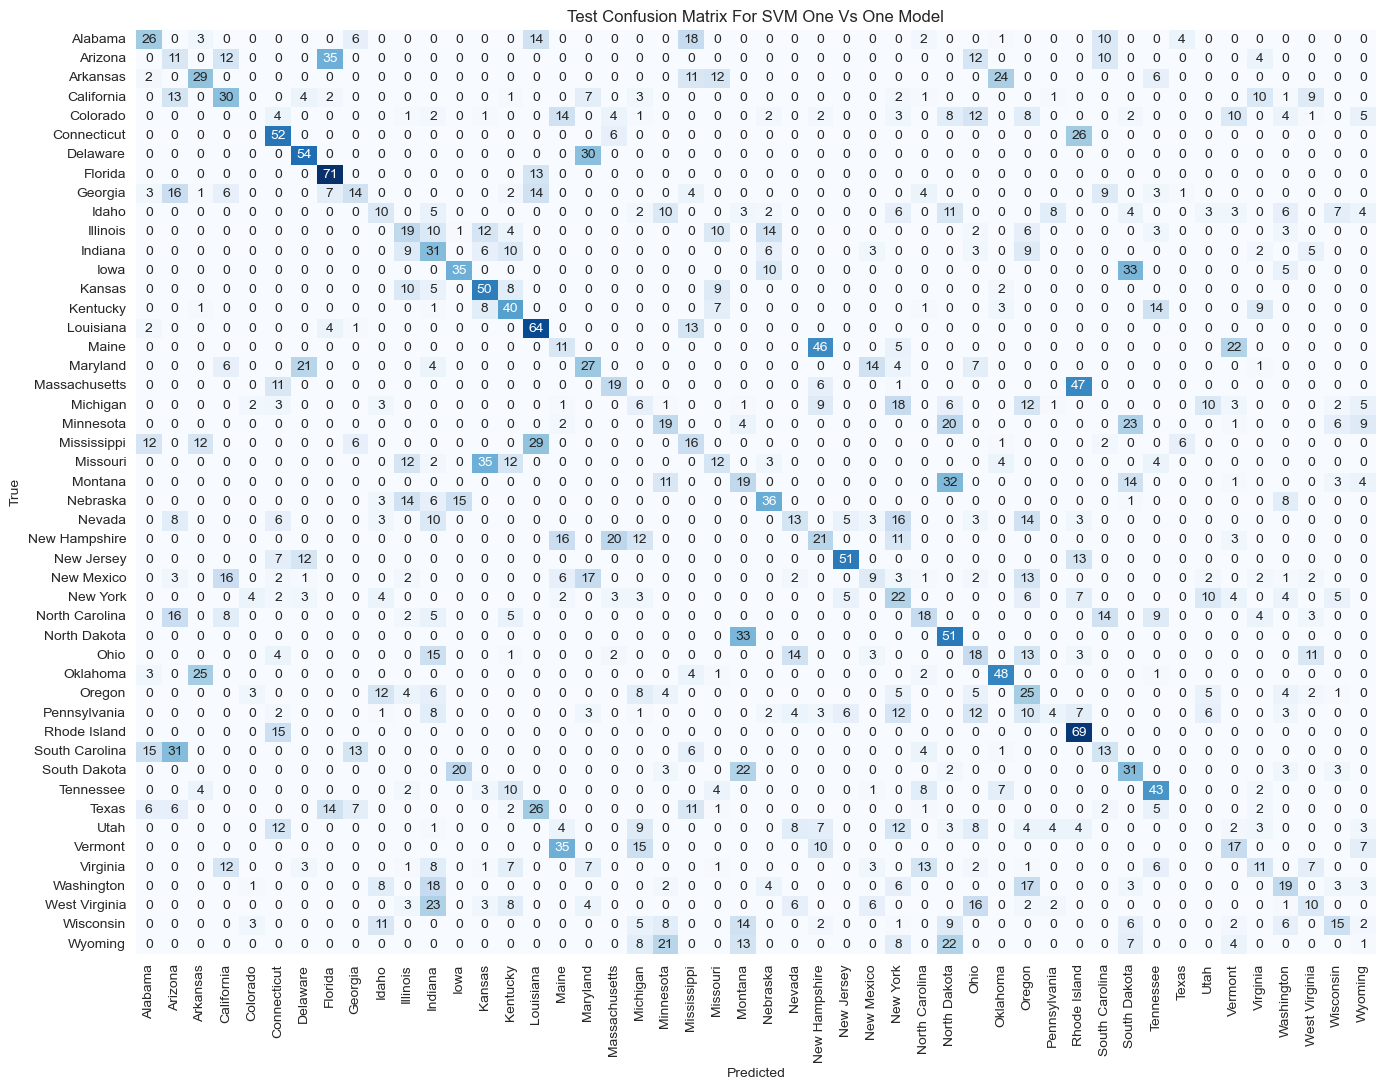

In [113]:
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix(y_test_s['state'], svm_pred_ova), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix For SVM One Vs One Model')
plt.savefig('graph/cm_ovo.png')
plt.show()

Now we see that for both SVM models, the confusion matrix is a lot cleaner than the Logistic Regression Model. The models' higher accuracy, precision, recall and f1 scores is evidenced by the strong diagonal line going through the confusion matrix. Although better, These models still have some false negative and positive instances as shown by the number of predictions outside the diagonal line. Even with the high scores, we can see that both models often times confuse similar classes, leading to higher false negative predictions. This is clearly seen in the data for the 'Missouri' state, which while having a relatively high number of correct predictions, the mistakes it makes are all for similar classes.

#### 3.4.3 Analysis of Naive Bayes

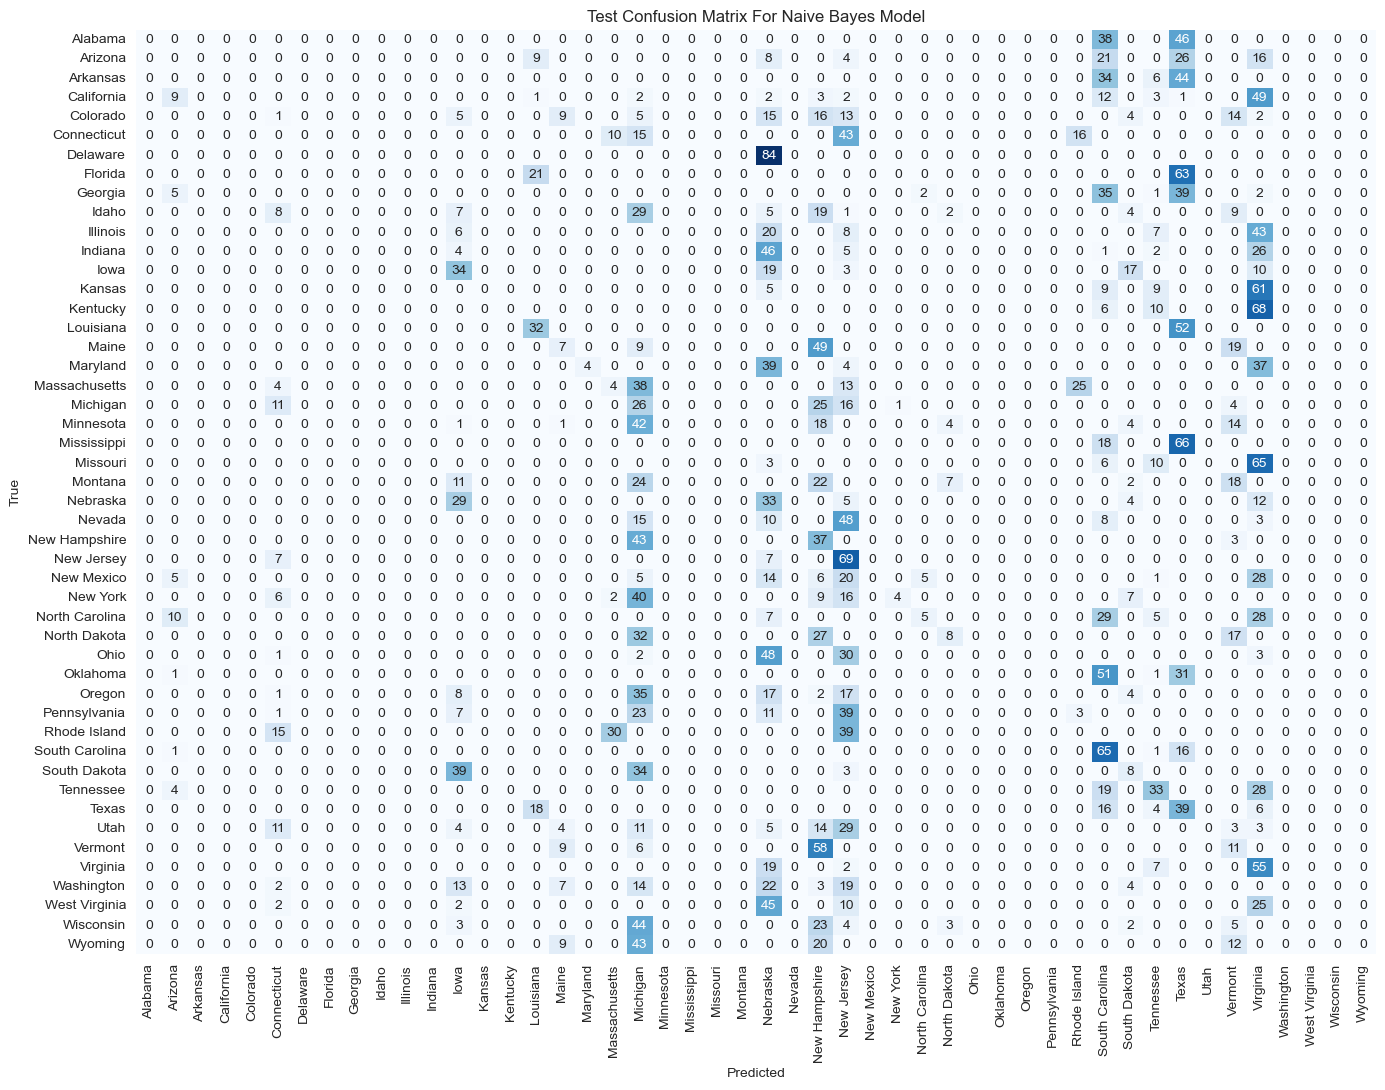

In [114]:
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix(y_test_s['state'], nb_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix For Naive Bayes Model')
plt.savefig('graph/cm_bayes.png')
plt.show()

The Naive Bayes is seems to be the worst model so far, as shown by its messy confusion model. Unlike other models, there is no clear diagonal line. Instead it seems that the diagonal is often broken in several points, where the model's predictions seem completely wrong. This shows that the Naive bayes model, while being good for some classes, completely breaks down for other classes. This leads to a messy confusion matrix with its predictions being all over the place.

#### 3.2.4 Analysis of Custom Neural Network

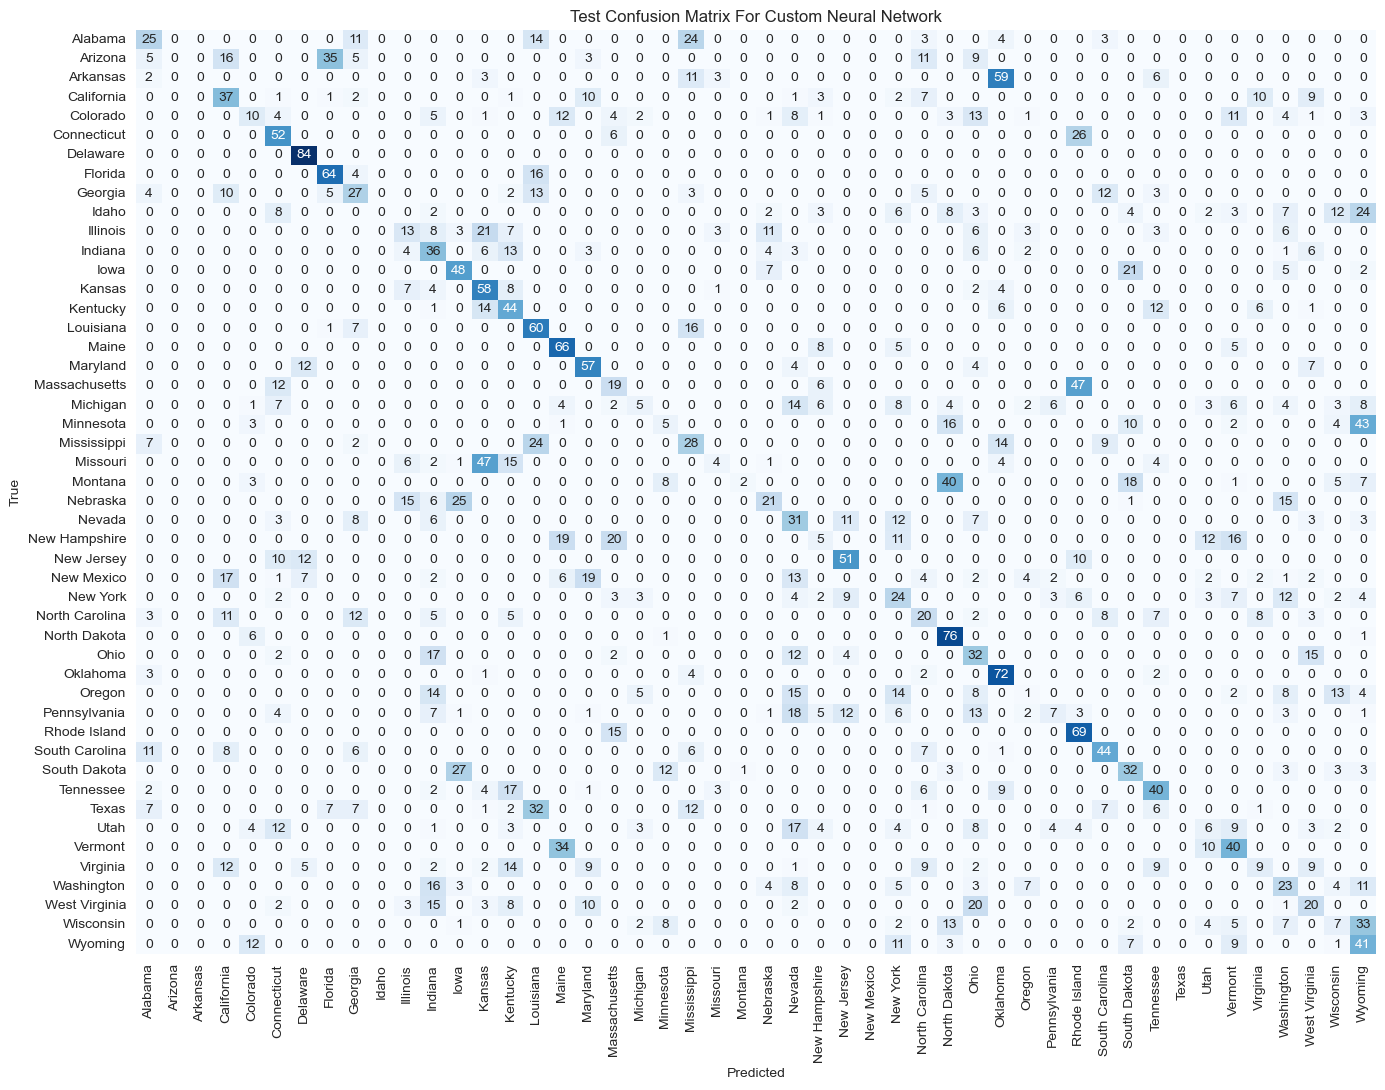

In [115]:
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix(nn_true, nn_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix For Custom Neural Network')
plt.savefig('graph/cm_test_nn.png')
plt.show()

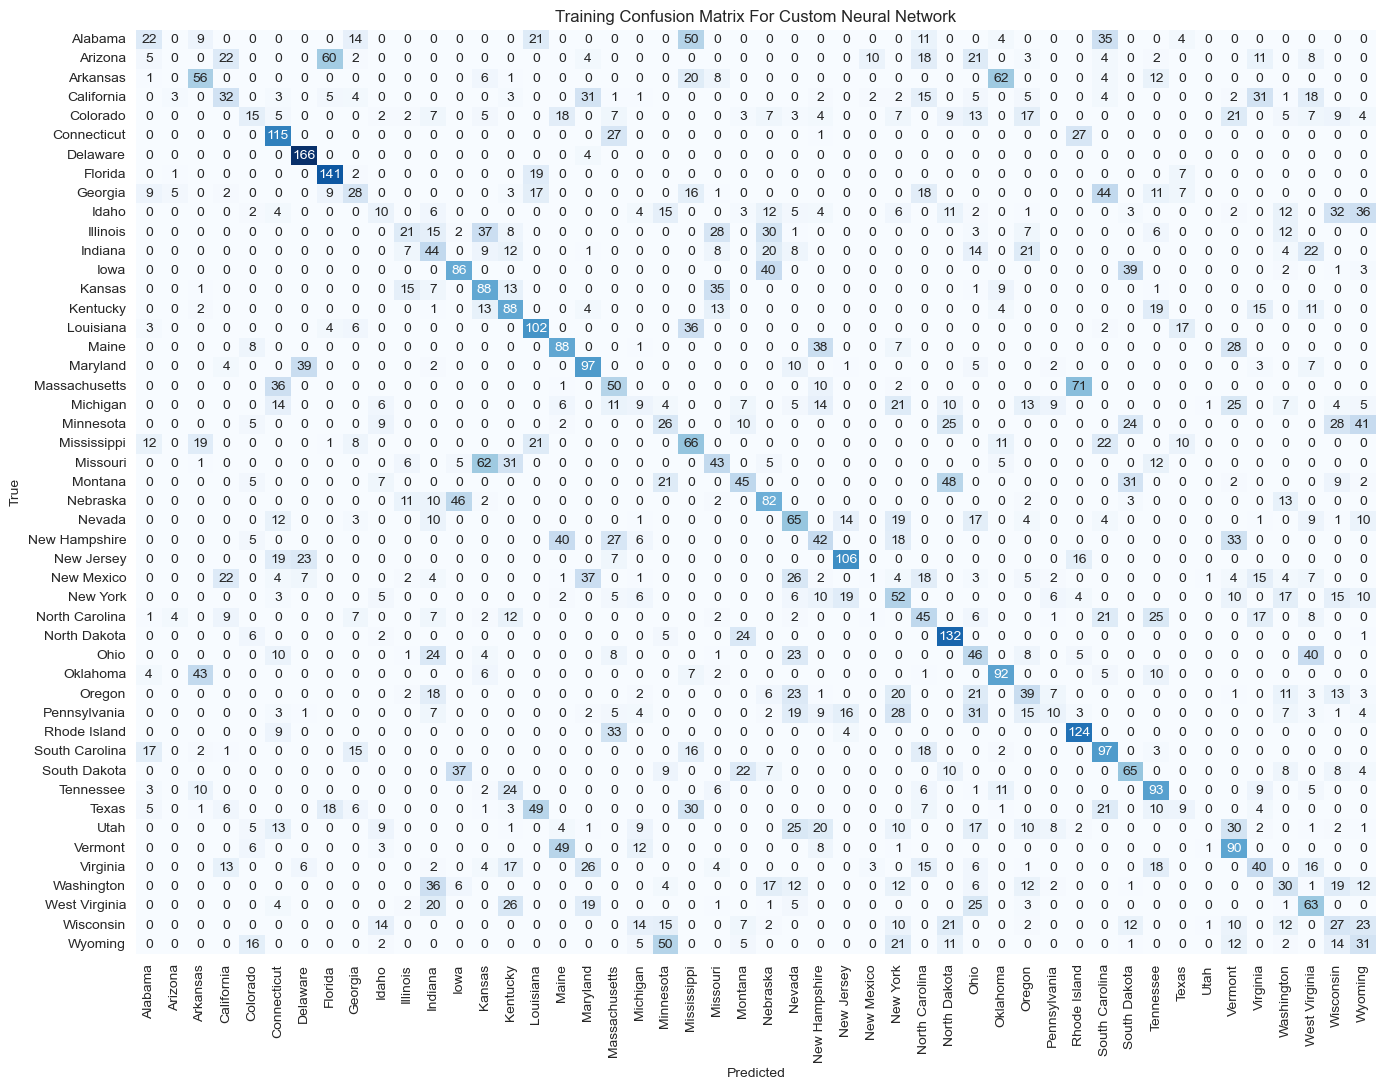

In [116]:
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix(all_labels, all_preds), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Training Confusion Matrix For Custom Neural Network')
plt.savefig('graph/cm_train_nn.png')
plt.show()

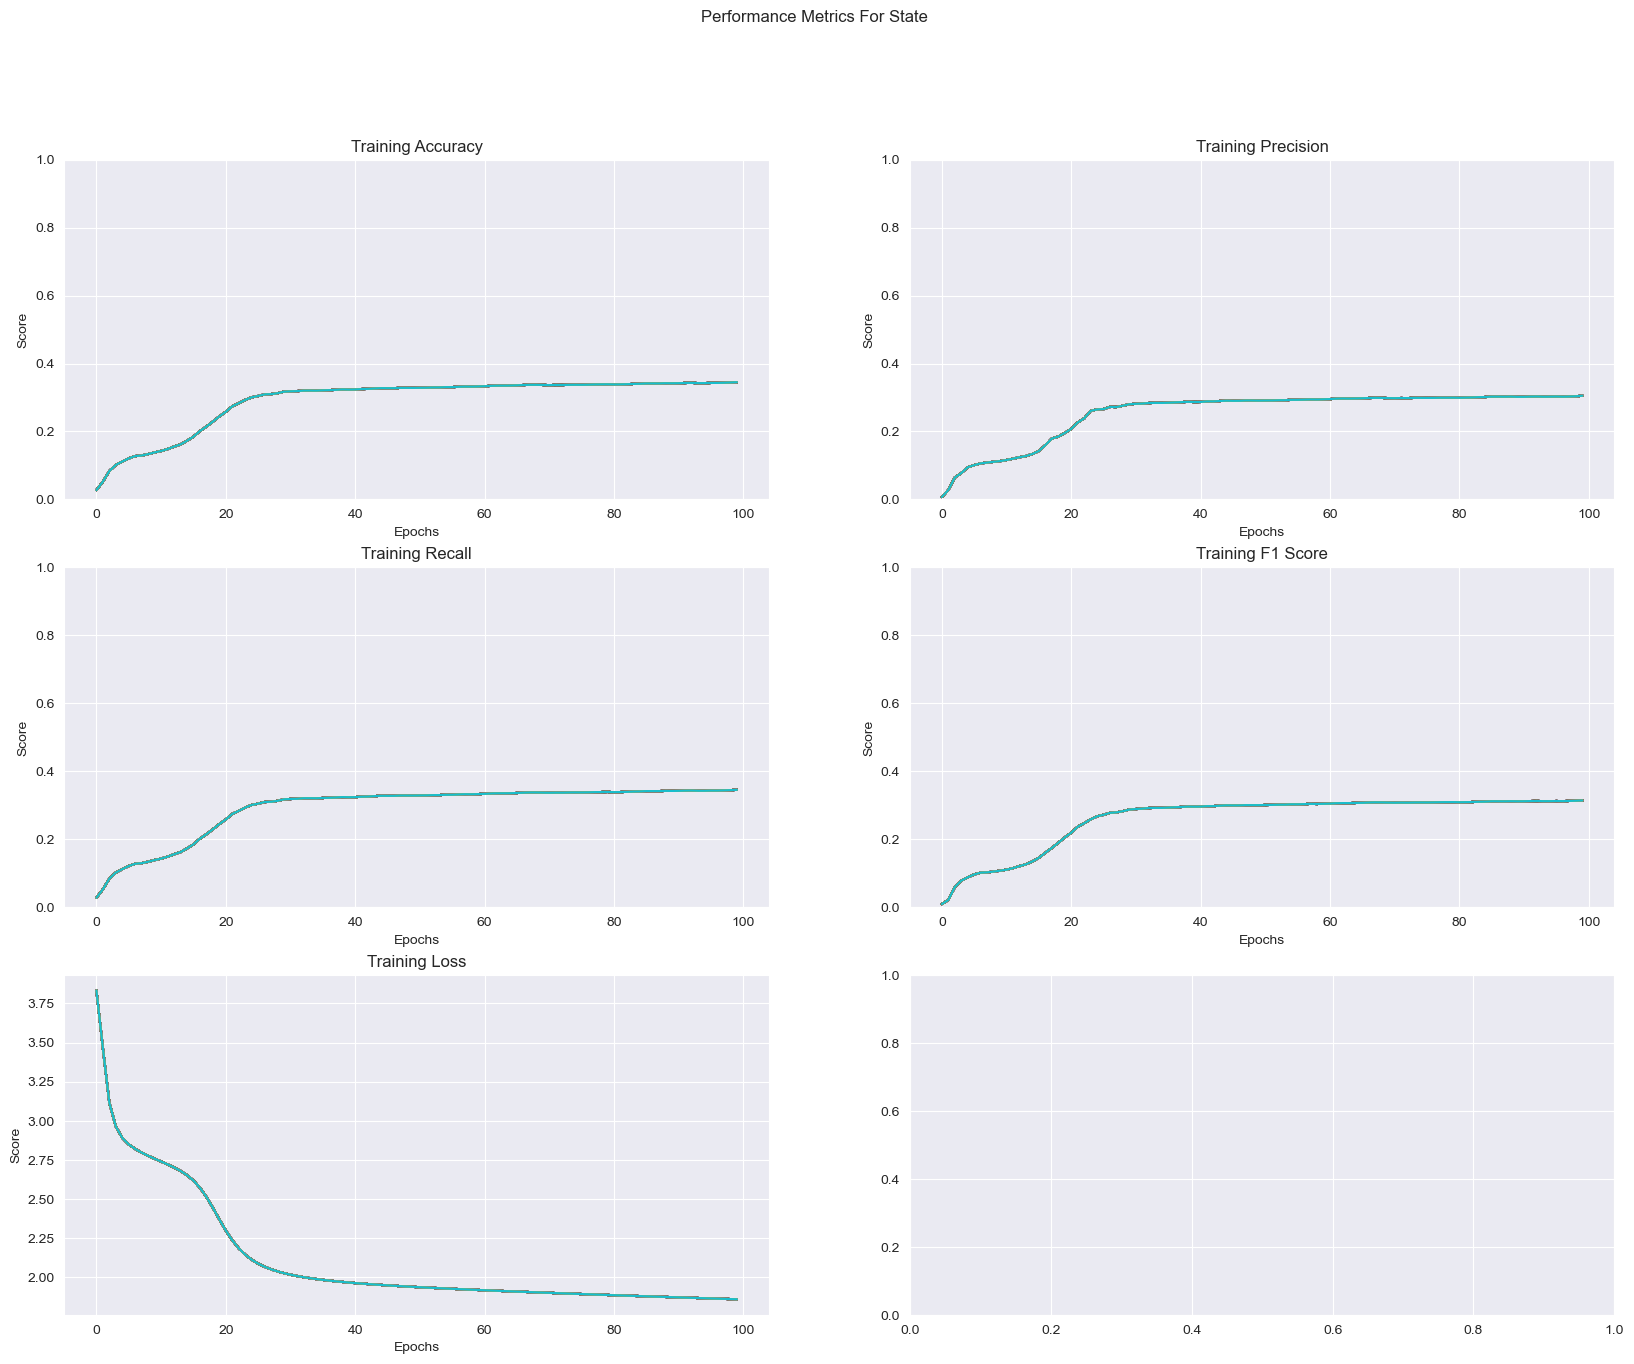

In [117]:
fig, axs = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle('Performance Metrics For State')

ep = range(epochs)

for e in ep:

    axs[0, 0].plot(ep, train_acc)
    axs[0, 0].set_title('Training Accuracy')
    axs[0, 0].set_xlabel('Epochs')
    axs[0, 0].set_ylabel('Score')
    axs[0, 0].set_ylim(0, 1)

    axs[0, 1].plot(ep, train_pre, label='Train')
    axs[0, 1].set_title('Training Precision')
    axs[0, 1].set_xlabel('Epochs')
    axs[0, 1].set_ylabel('Score')
    axs[0, 1].set_ylim(0, 1)


    axs[1, 0].plot(ep, train_rec, label='Train')
    axs[1, 0].set_title('Training Recall')
    axs[1, 0].set_xlabel('Epochs')
    axs[1, 0].set_ylabel('Score')
    axs[1, 0].set_ylim(0, 1)


    axs[1, 1].plot(ep, train_f1, label='Train')
    axs[1, 1].set_title('Training F1 Score')
    axs[1, 1].set_xlabel('Epochs')
    axs[1, 1].set_ylabel('Score')
    axs[1, 1].set_ylim(0, 1)


    axs[2, 0].plot(ep, train_loss, label='Train')
    axs[2, 0].set_title('Training Loss')
    axs[2, 0].set_xlabel('Epochs')
    axs[2, 0].set_ylabel('Score')


plt.show()

Finally, for our custom neural network, we can see the cleanest confusion matrices so far out of all the models. Both the training and testing confusion matrices show similar clear diagonal lines through the confusion matrix.This pattern is shown for both the training and testing set, showing us that the model is not overfitted on the training data.  

Although the model makes some mistakes, as evidenced by the incorrect predictions outside the diagonal line, the mistakes are lower than other models. And unlike models like SVM, its mistakes are not spread out over several closely related classes. And while it can still mistake similar classes for one another, its mistakes are mostly for very similar classes, as shown by very few back to back false negatives for similar classes.  

We can also get a better feel for the neural networks training performance by the graphs of its  various scores and losses.

The Accuracy, Precision, Recall and F1 Scores all show similar graphs all thoughout the training process. And while they all start out show, see see significant jumps in performance in around five epochs, after which it slows down to a steady increase. This continues up until the end of 100 epochs, where its able to achieve a respectable score of around 90%. This slow increase shows that the model learns slowly but surely. This is further evidenced by the small differences in the training and testing scores, which disproves any notion of the model overfitting.

The depicted loss graph shows a discernible pattern: a rapid decline in loss scores within the initial five epochs, followed by a gradual reduction until the model's training concludes. Particularly, the loss graph exhibits a symmetrical correspondence with other metric graphs, showing a linear correlation among accuracy, precision, recall, F1 score, and the loss function throughout the training phase.